In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
data = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
dfnm = data.select_dtypes(include='number')
dfnm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [3]:
X = dfnm.drop('total_claim_amount', axis=1) # input variable
y = dfnm.total_claim_amount # target variable

In [4]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [5]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1935,12622,61844,106,19,74,0,2
2181,2808,55005,70,7,39,0,1
6115,2893,30406,73,29,93,0,1


In [6]:
# Scaling
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

The R2 score for the train set is: 0.4088003378941778
The R2 score for the test set is:  0.41142812483510915


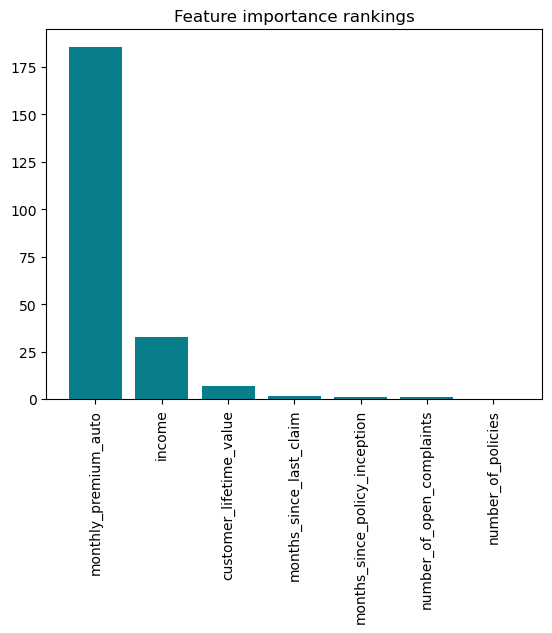

In [19]:
## LINEAR REGRESSION
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

# Model prediction
X_test_scaled = scaler.transform(X_test)
y_test_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_train_pred =  pd.DataFrame(model.predict(X_train_scaled),columns = ['target_d'])

# Model Evaluation: R2
R2_test=r2_score(y_test,y_test_pred) # R2 score between the predicted Y test and the actual Y test
R2_train=r2_score(y_train,y_train_pred) # R2 score between the predicted Y train and the actual Y train
print("The R2 score for the train set is:" , R2_train)  
print("The R2 score for the test set is: " , R2_test)


# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

# Feature importance plotting
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()